/var/folders/6d/_5nhjkzn7nv4k9w_20hpg0nr0000gn/T/ipykernel_2308/14581859.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data['Total Amount'].resample('M').sum()  # Resample to monthly data
/var/folders/6d/_5nhjkzn7nv4k9w_20hpg0nr0000gn/T/ipykernel_2308/14581859.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


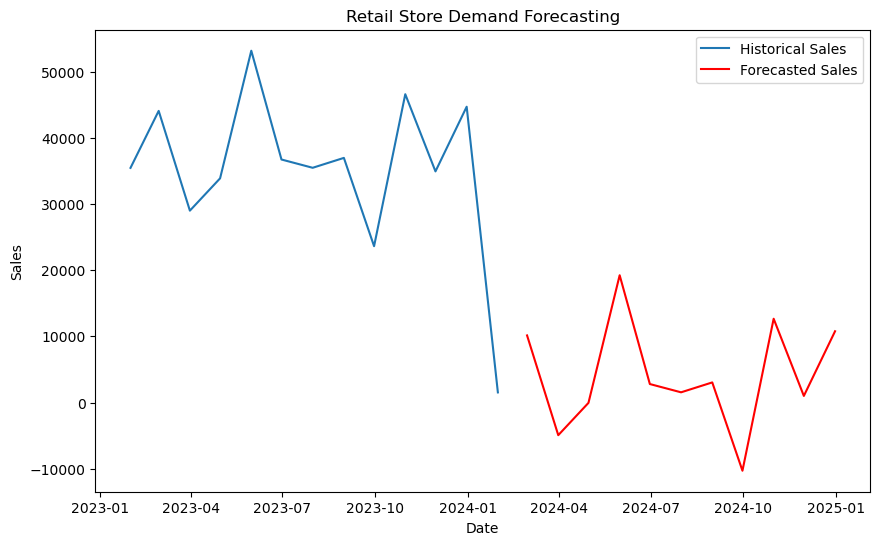

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv('/Users/mohammedadham/Desktop/Project-3/retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

data = data['Total Amount'].resample('M').sum()  # Resample to monthly data

data = data.fillna(method='ffill')

model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1], periods=12, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(data, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', color='red')
plt.title('Retail Store Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

